In [66]:
import pandas as pd
from IPython.display import display

# File path
file_path = '/Users/diegogutierrez/Desktop/Projects/heart+disease/cleve.mod'

# Open the file and skip metadata lines
with open(file_path, 'r') as file:
    lines = file.readlines()

# Filter out lines starting with '%' (comments and metadata)
data_lines = [line.strip() for line in lines if not line.startswith('%') and line.strip()]

# Create a DataFrame by splitting on whitespace
df = pd.DataFrame([line.split() for line in data_lines])

# Assign column names based on dataset documentation
column_names = [
    'age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
    'rest_ecg', 'max_hr', 'exercise_angina', 'oldpeak', 'slope', 
    'num_vessels', 'thal', 'class', 'unknown'
]
df.columns = column_names

# Drop the "unknown" column if it's not needed
df = df.drop(columns=['unknown'])

# Convert numeric columns to appropriate types
numeric_cols = ['age', 'rest_bp', 'cholesterol', 'max_hr', 'oldpeak', 'num_vessels']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

display(df)


,age,sex,chest_pain,rest_bp,cholesterol,fasting_bs,rest_ecg,max_hr,exercise_angina,oldpeak,slope,num_vessels,thal,class
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,male,notang,124.0,255.0,true,norm,175.0,fal,0.0,up,2.0,norm,buff
299,57.0,male,asympt,132.0,207.0,fal,norm,168.0,true,0.0,up,0.0,rev,buff
300,49.0,male,notang,118.0,149.0,fal,hyp,126.0,fal,0.8,up,3.0,norm,sick
301,74.0,fem,abnang,120.0,269.0,fal,hyp,121.0,true,0.2,up,1.0,norm,buff


**REMOVING MISSING VALUES**

In [67]:
print(df.isnull().sum())

age                0
sex                0
chest_pain         0
rest_bp            0
cholesterol        0
fasting_bs         0
rest_ecg           0
max_hr             0
exercise_angina    0
oldpeak            0
slope              0
num_vessels        5
thal               0
class              0
dtype: int64


In [69]:
# Count the number of missing values
print(df['num_vessels'].isnull().sum())

# Check the rows with missing values
print(df[df['num_vessels'].isnull()])

# Impute missing values in the num_vessels column with the median (Median Imputation)
df['num_vessels'] = df['num_vessels'].fillna(df['num_vessels'].median())


0
Empty DataFrame
Columns: [age, sex, chest_pain, rest_bp, cholesterol, fasting_bs, rest_ecg, max_hr, exercise_angina, oldpeak, slope, num_vessels, thal, class]
Index: []


**BALANCE IN DISTRIBUTION OF TARGET VARIABLE**

In [70]:
print(df['class'].value_counts())

class
buff    165
sick    138
Name: count, dtype: int64


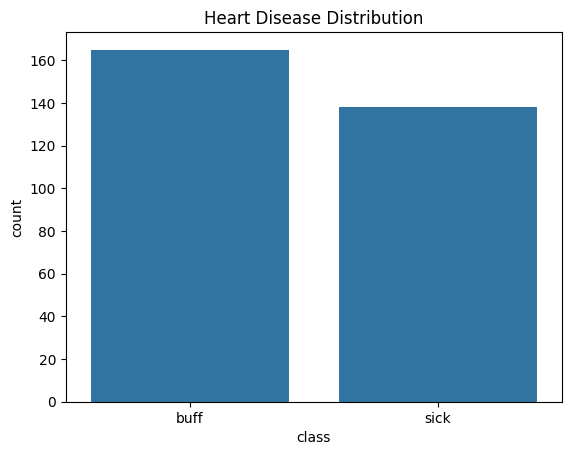

In [71]:
# Countplot for categorical variables
sns.countplot(x='class', data=df)
plt.title('Heart Disease Distribution')
plt.show()

In [75]:
# Separate features (X) and target (y)
X = df.drop(columns=['class'])  # Replace 'class' with the actual target column name
y = df['class']

# Encode target labels: buff -> 0, sick -> 1
y = y.map({'buff': 0, 'sick': 1})

y

0      0
1      1
2      1
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: class, Length: 303, dtype: int64

In [80]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Instantiate undersampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check new class distribution
print("Class distribution after undersampling:", Counter(y_resampled))

# Combine X_resampled and y_resampled into a single DataFrame
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='class')], axis=1)

display(resampled_df)

Class distribution after undersampling: Counter({0: 138, 1: 138})


,age,sex,chest_pain,rest_bp,cholesterol,fasting_bs,rest_ecg,max_hr,exercise_angina,oldpeak,slope,num_vessels,thal,class
250,58.0,male,abnang,125.0,220.0,fal,norm,144.0,fal,0.4,flat,0.0,rev,0
213,49.0,fem,asympt,130.0,269.0,fal,norm,163.0,fal,0.0,up,0.0,norm,0
241,39.0,fem,notang,138.0,220.0,fal,norm,152.0,fal,0.0,flat,0.0,norm,0
103,41.0,male,abnang,135.0,203.0,fal,norm,132.0,fal,0.0,flat,0.0,fix,0
177,43.0,male,asympt,110.0,211.0,fal,norm,161.0,fal,0.0,up,0.0,rev,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,58.0,fem,abnang,136.0,319.0,true,hyp,152.0,fal,0.0,up,2.0,norm,1
291,61.0,male,asympt,138.0,166.0,fal,hyp,125.0,true,3.6,flat,1.0,norm,1
292,42.0,male,asympt,136.0,315.0,fal,norm,125.0,true,1.8,flat,0.0,fix,1
295,77.0,male,asympt,125.0,304.0,fal,hyp,162.0,true,0.0,up,3.0,norm,1


**EXPLORATORY DATA ANALYSIS**

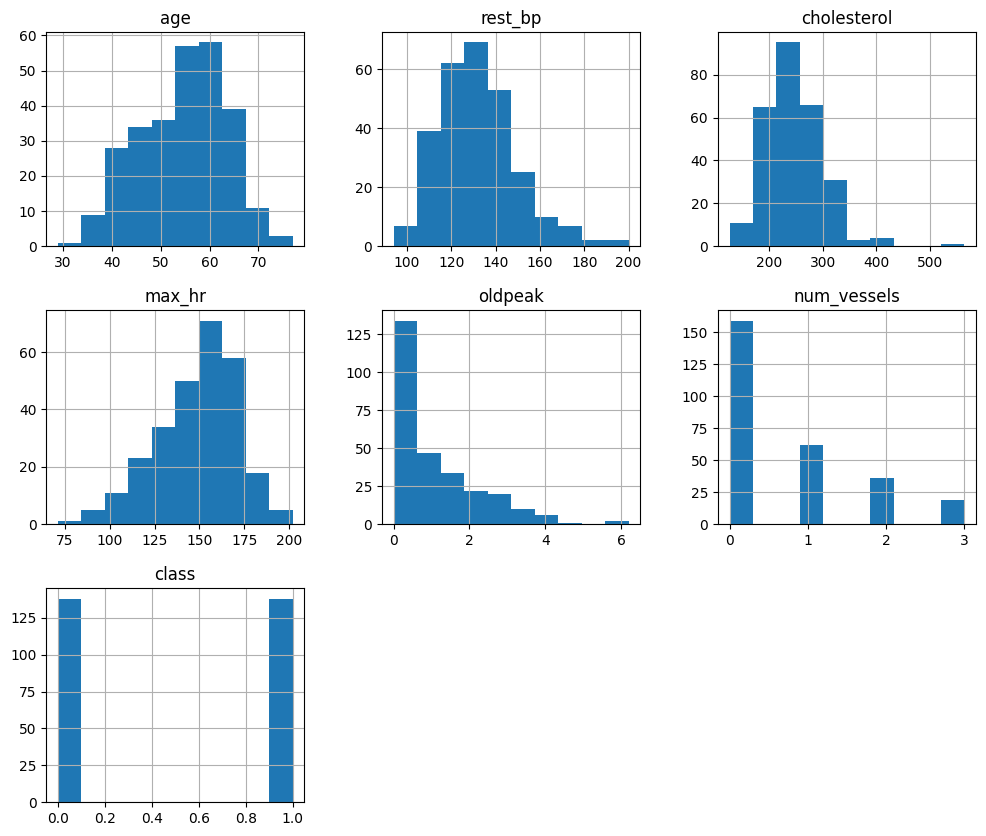

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numeric variables
resampled_df.hist(figsize=(12, 10))
plt.show()

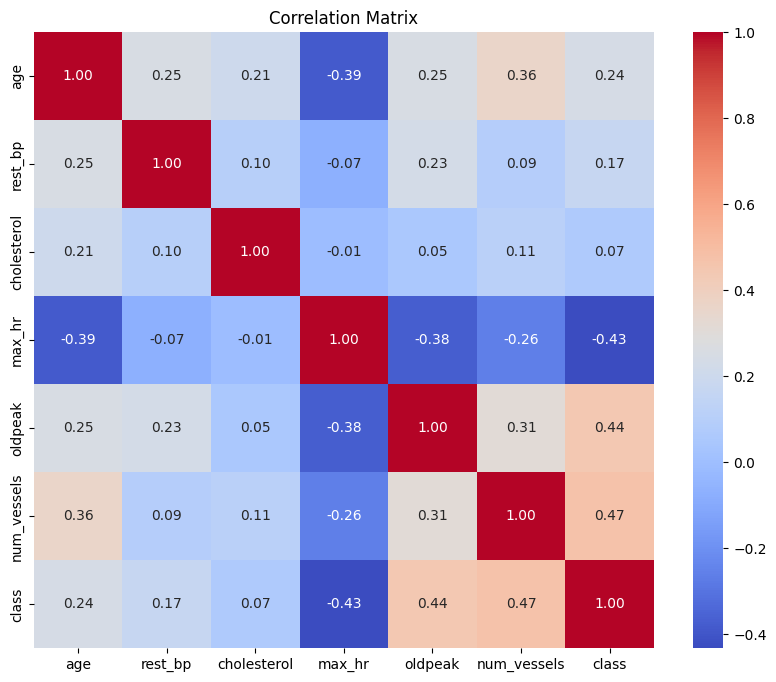

In [121]:
# Select numeric columns
numeric_df = resampled_df.select_dtypes(include=['number'])

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


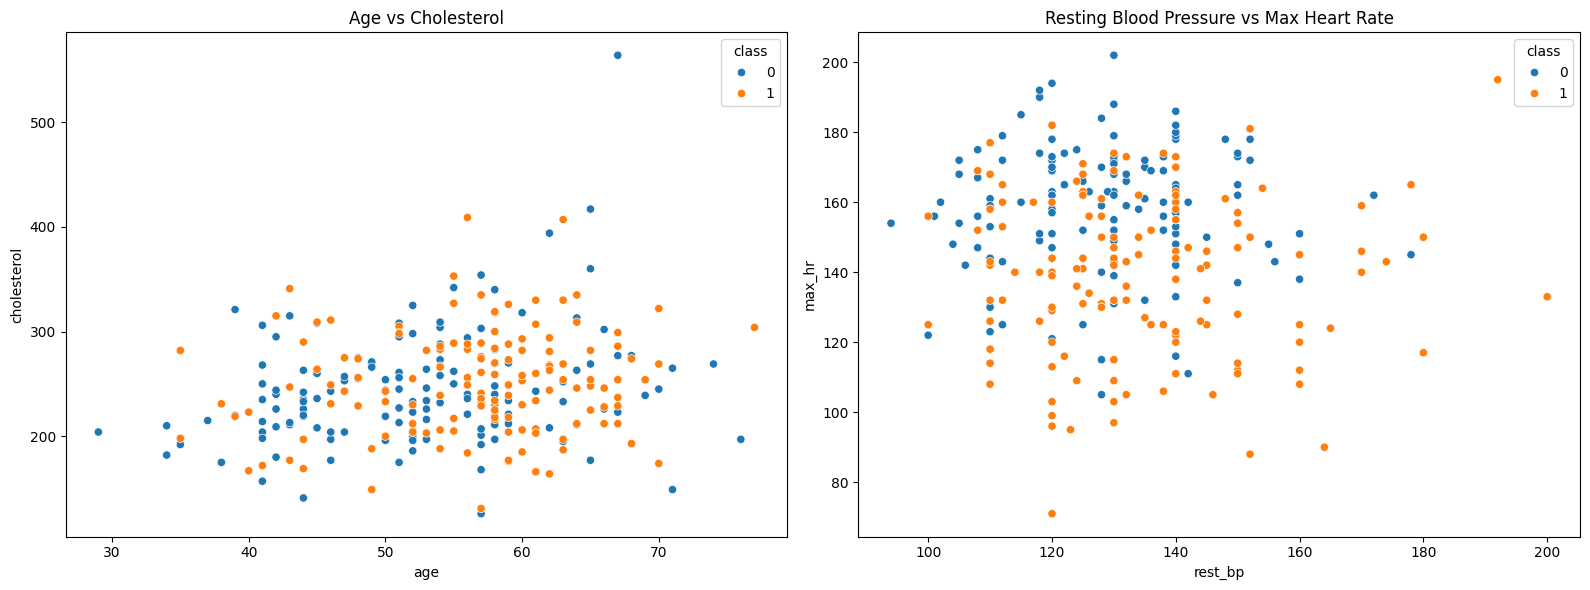

In [122]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# First scatterplot
sns.scatterplot(ax=axes[0], x='age', y='cholesterol', hue='class', data=resampled_df)
axes[0].set_title('Age vs Cholesterol')

# Second scatterplot
sns.scatterplot(ax=axes[1], x='rest_bp', y='max_hr', hue='class', data=resampled_df)
axes[1].set_title('Resting Blood Pressure vs Max Heart Rate')

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: xlabel='class', ylabel='cholesterol'>

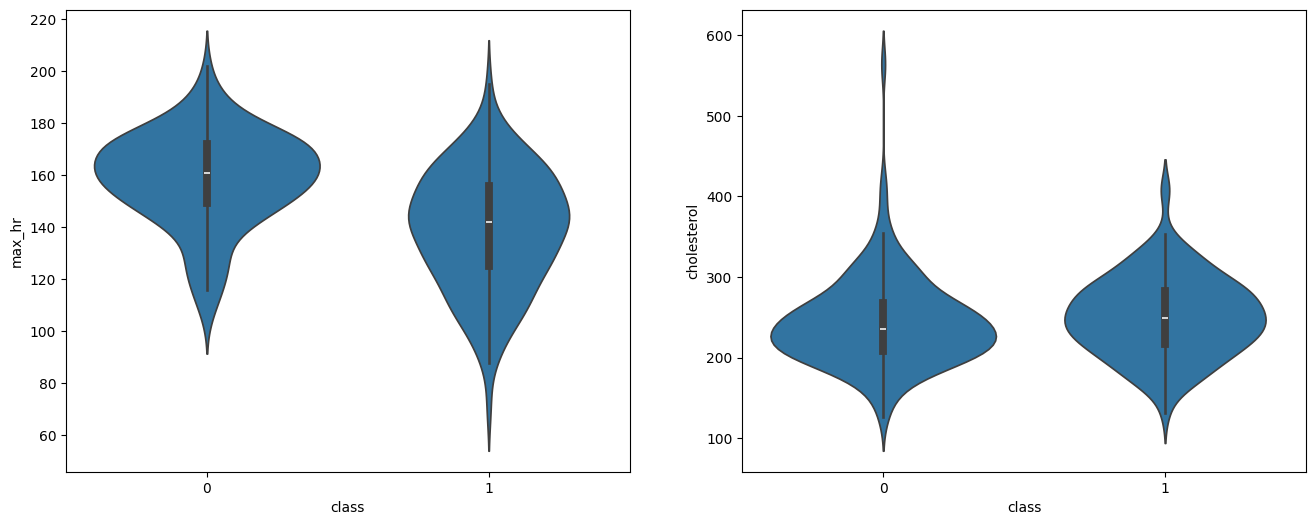

In [123]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

sns.violinplot(ax=axes[0], x='class', y='max_hr', data=resampled_df)

sns.violinplot(ax=axes[1], x='class', y='cholesterol', data=resampled_df)


**FEATURE ENGINEERING**

In [126]:
# Cholesterol-to-Blood Pressure Ratio
resampled_df['chol_bp_ratio'] = resampled_df['cholesterol'] / resampled_df['rest_bp']
resampled_df

,age,sex,chest_pain,rest_bp,cholesterol,fasting_bs,rest_ecg,max_hr,exercise_angina,oldpeak,slope,num_vessels,thal,class,chol_bp_ratio
250,58.0,male,abnang,125.0,220.0,fal,norm,144.0,fal,0.4,flat,0.0,rev,0,1.760000
213,49.0,fem,asympt,130.0,269.0,fal,norm,163.0,fal,0.0,up,0.0,norm,0,2.069231
241,39.0,fem,notang,138.0,220.0,fal,norm,152.0,fal,0.0,flat,0.0,norm,0,1.594203
103,41.0,male,abnang,135.0,203.0,fal,norm,132.0,fal,0.0,flat,0.0,fix,0,1.503704
177,43.0,male,asympt,110.0,211.0,fal,norm,161.0,fal,0.0,up,0.0,rev,0,1.918182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,58.0,fem,abnang,136.0,319.0,true,hyp,152.0,fal,0.0,up,2.0,norm,1,2.345588
291,61.0,male,asympt,138.0,166.0,fal,hyp,125.0,true,3.6,flat,1.0,norm,1,1.202899
292,42.0,male,asympt,136.0,315.0,fal,norm,125.0,true,1.8,flat,0.0,fix,1,2.316176
295,77.0,male,asympt,125.0,304.0,fal,hyp,162.0,true,0.0,up,3.0,norm,1,2.432000


In [129]:
# Correlation matrix with new features
print(resampled_df[['chol_bp_ratio', 'class']].corr())

               chol_bp_ratio  class   
chol_bp_ratio  1.000000      -0.022576
class         -0.022576       1.000000


In [132]:
# Group by target class and compute the mean
print(resampled_df.groupby('class')['chol_bp_ratio'].mean())

class
0    1.916323
1    1.895811
Name: chol_bp_ratio, dtype: float64


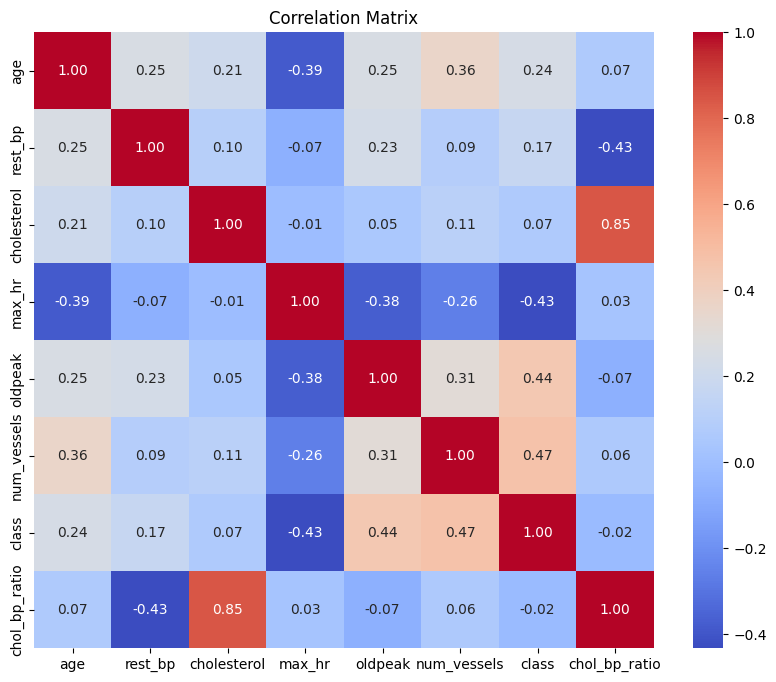

In [130]:
# Select numeric columns
new_feat_numeric_df = resampled_df.select_dtypes(include=['number'])

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(new_feat_numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

Final decision of removing chol_bp_ratio for the following reasons:
- Low Correlation: No linear relationship with the target.
- Indistinguishable Means: Classes have almost identical averages.

**Preparing Data for Model**

In [139]:
print(X_train.dtypes)

age                float64
sex                 object
chest_pain          object
rest_bp            float64
cholesterol        float64
fasting_bs          object
rest_ecg            object
max_hr             float64
exercise_angina     object
oldpeak            float64
slope               object
num_vessels        float64
thal                object
chol_bp_ratio      float64
dtype: object


In [155]:
# One-hot encode categorical variables
encoded_df = pd.get_dummies(resampled_df, columns=['chest_pain', 'rest_ecg', 'slope', 'thal'], drop_first=True)
encoded_df = encoded_df.drop(columns=['sex'])

# Convert all boolean columns to integers (0 and 1)
encoded_df = encoded_df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})

# Explicitly convert 'fasting_bs' and 'exercise_angina' columns
encoded_df['fasting_bs'] = df['fasting_bs'].replace({'fal': 0, 'true': 1}).astype(int)
encoded_df['exercise_angina'] = df['exercise_angina'].replace({'fal': 0, 'true': 1}).astype(int)

encoded_df


/var/folders/0c/5s3_7pbd2fldx0g6dndncf7c0000gn/T/ipykernel_16566/1808407592.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df['fasting_bs'] = df['fasting_bs'].replace({'fal': 0, 'true': 1}).astype(int)
/var/folders/0c/5s3_7pbd2fldx0g6dndncf7c0000gn/T/ipykernel_16566/1808407592.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df['exercise_angina'] = df['exercise_angina'].replace({'fal': 0, 'true': 1}).astype(int)


,age,rest_bp,cholesterol,fasting_bs,max_hr,exercise_angina,oldpeak,num_vessels,class,chol_bp_ratio,chest_pain_angina,chest_pain_asympt,chest_pain_notang,rest_ecg_hyp,rest_ecg_norm,slope_flat,slope_up,thal_fix,thal_norm,thal_rev
250,58.0,125.0,220.0,0,144.0,0,0.4,0.0,0,1.760000,0,0,0,0,1,1,0,0,0,1
213,49.0,130.0,269.0,0,163.0,0,0.0,0.0,0,2.069231,0,1,0,0,1,0,1,0,1,0
241,39.0,138.0,220.0,0,152.0,0,0.0,0.0,0,1.594203,0,0,1,0,1,1,0,0,1,0
103,41.0,135.0,203.0,0,132.0,0,0.0,0.0,0,1.503704,0,0,0,0,1,1,0,1,0,0
177,43.0,110.0,211.0,0,161.0,0,0.0,0.0,0,1.918182,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,58.0,136.0,319.0,1,152.0,0,0.0,2.0,1,2.345588,0,0,0,1,0,0,1,0,1,0
291,61.0,138.0,166.0,0,125.0,1,3.6,1.0,1,1.202899,0,1,0,1,0,1,0,0,1,0
292,42.0,136.0,315.0,0,125.0,1,1.8,0.0,1,2.316176,0,1,0,0,1,1,0,1,0,0
295,77.0,125.0,304.0,0,162.0,1,0.0,3.0,1,2.432000,0,1,0,1,0,0,1,0,1,0


In [156]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = encoded_df.drop(columns=['class'])  # Replace 'class' with the target column name
y = encoded_df['class']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (220, 19)
X_test shape: (56, 19)


SCALING

In [157]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [158]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1


In [159]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# ROC-AUC
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8392857142857143
ROC-AUC: 0.9362244897959184
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.83      0.86      0.84        28

    accuracy                           0.84        56
   macro avg       0.84      0.84      0.84        56
weighted avg       0.84      0.84      0.84        56

Confusion Matrix:
 [[23  5]
 [ 4 24]]


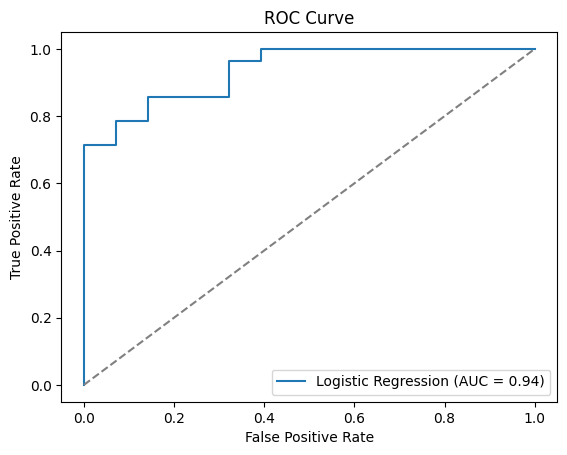

In [160]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [161]:
import os
print(os.getcwd())  # Current working directory of the notebook


/Users/diegogutierrez/Desktop/Projects
